## Proyecto TSFC: Oscilaciones en Sistemas Biológicos

## Comportamiento de Testosterona

### Hernández de la Vega Alejandro
### Rodríguez Rosenblueth César Daniel
### Santiago Santos Eva Yazmín 

# Osciladores biológicos #  

Bien sea la respiración, la elaboración de marcapasos para asistir la actividad cardiaca o la secreción de testosterona en los hombres, existen varios sistemas biológicos que exhiben un carácter oscilatorio. Una primera aproximación para el estudio de estos sistemas desemboca en ecuaciones diferenciales ordinarias del tipo:

$$\dfrac{du}{dt} = f(u)$$

Donde, para sistemas periódicos se tiene:

$$u(t+T)= u(t) $$

con el periodo $T>0$

No obstante, existen casos (como en la síntesis de enzimas durante la división celular o en el estudiado en este trabajo) donde el sistema viene regulado por un control de retroalimentación. En este sentido, el sistema viene dado por una serie de reacciones ligadas, llevándose acabo una reacción seguida de otra y en donde la primera de éstas viene regulada por una función de retroalimentación que involucra la última reacción, i.e. si tenemos n reacciones:
$$ \dfrac{d u_1}{dt} = f(u_n )k_1 u_1 $$ 
$$ \dfrac{d u_r}{dt}= u_{r-1} -k_r u_r $$

con $r=2,3,...,n$ , $ k_r > 0 $ constantes determinadas por el sistema en cuestión y $ f(u)$ la función de retroalimentación.

Los trabajos de Tyson y de Othmer(1978) y Yagil (1971) muestran que la función de retroalimentación tiene que ser una función siempre positiva y monótona decreciente _para asegurar la unicidad de las soluciones de estado estacionario_


# Características de la testosterona #

La testosterona es una hormona cuya función principal es estimular el desarrollo de los caracteres sexuales masculinos, y está presente en mamíferos, reptiles y aves. Para el ser humano, en los hombres el nivel de testosterona se encuentra entre 10-35 nanomoles por litro de sangre, mientras que en las mujeres es de 0.7-2.7 nanomoles por litro. La testosterona es principalmente producida en los testículos en los hombres y en los ovarios de las mujeres, en los hombres, los niveles de testoterona oscilan con un periodo de 2 a 3 horas.

Existen cambios de personalidad relacionados con la concentración de testosterona en la sangre, por ejemplo niveles bajos de testosterona vienen acompañados con actitudes dóciles en los sujetos, además, pacientes que padecen de cáncer de próstata, son sometidos a un tratamiento que involucra la toma de _Goserelina_, una droga que al término de un par de semanas reduce el nivel de testosterona al grado que se alcanzaría a través de la castración. 

## Secreción de la testosterona##

La secreción de testosterona (T) por parte de las gónadas viene regulada por la hormona luteinizante (LH) generada en la glándula pituitaria, esta última viene regulada, a su vez, por la hormona liberadora de hormona luteinizante (LHRH) que es secretada en el hipotálamo. Además la testosterona ejerce una retroalimentación en la producción de LHRH. 

Entonces, en este sistema, el hipotálamo secreta hormona liberadora de hormona luteinizante que es llevada a través del torrente sanguíneo a la glándula pituitaria, donde se controla la secreción de hormona luteinizante que finalmente controla la producción de testosterona en las gónadas, es entonces que se ejerce la retroalimentación entre de los testículos hacia el hipotálamo.


Entonces, denotando a T, LH y LHRH por $T(t) L(t)$ y $R(t)$ respectivamente, tenemos que:

$$ \frac{dR}{dt} = f(T)-b_{1}R$$
$$ \frac{dL}{dt} = g_{1}R-b_{2}L $$
$$ \frac{dT}{dt} = g_{2}L-b_{3}T $$

Deescrito por el siguiente diagrama
![Diagrama del modelo](Imagenes/Diagramas/Diagram1.png)

Matemáticamente $b_{1}$, $b_{2}$, $b_{3}$, $g_{1}$, $g_{2}$ son parámetros positivos. Biológicamente $g_{1}$,$g_{2}$ y $f(T)$ son las tasas de secreción de las hormonas LHRH, LH y T respectivamente. Además  $g_{1}$,$g_{2}$ son los valores de prealimentación para R y L respectivamente, mientras que f(T) es una función de retroalimentación para las dos hormonas precursoras. Por tanto deben estar representadas por funciones monótonas crecientes. Por otro lado $b_{1}$, $b_{2}$, $b_{3}$ represetan la tasa de difussión de las hormonas en el torrente sanguinio.

Ambos están dados en valores de concentración por hora.

Para los puntos de estabilidad se tiene lo siguiente:

![Teorema de Estabilidad](Imagenes/Teoremas/Theorem1.png)



Alrededor del punto de equilibrio se tiene:

$$ \frac{dx}{dt} = f'(T_{0})z(t) - b_{1}x(t) $$
$$ \frac{dy}{dt} = g_{1}x(t) - b_{2}y(t) $$
$$ \frac{dz}{dt} = g_{2}y(t-\tau)-b_{3}z(t) $$

Donde
$$ z(t)=T(t)-T_{0} $$
$$ y(t)=L(t)-L_{0} $$
$$ x(t)=R(t)-R_{0} $$

### Notas
Hay que revisar los valores que da el artículo para K, son a partir de los cuales se encuentran las constantes de equilibrio para las tres funciones. Adicionalmente están dados en términos de las otras cinco variables de propocionalidad de la ecuación. 

De igual manera falta entender bien el valor de 'p' o 'm' (valor en el artículo y valor en el libro.)

In [1]:
using PyPlot
using TaylorSeries

In [2]:
function h_find(x::Array,p::Int)
    h1 = (1/10)*(eps(1.0)/abs(x[p+1]))^(1/p)
    h2 = (1/10)*(eps(1.0)/abs(x[p]))^(1/(p-1))
    if h1 - h2 >= 0
        return h2
    else
        return h1
    end
end

h_find (generic function with 1 method)

### Primer modelo

In [3]:
"""
La función testosterona1 resuelve utilizando coeficientes de Taylor la ecuación diferencial \n
R'(t) = f(T)-b1*R(t) \n
L'(t) = g1*R(t)-b2*L(t) \n
T'(t) = g2*L(t)-b3*T(t) \n

Donde la función de retroalimentación está dada por
f(T) = A/(K+T^m)

La función recibe los valores en el siguiente orden: \n Testosterone1(p,R0,T0,L0,t0,tf,g1,g2,b1,b2,b3,A,K,m) \n
'p' determina el orden del polinomio de Taylor a utilizar. Las letras como R0 representan el valor inicital de R al tiempo 0.
Por otro lado t0 y tf determinan el tiempo inicial y final en el que se requiere la solución, y
las tasas de difussión de las hormonas están dadas por b1,b2 y b3; las tasas de secreción y prealimentación, por g1 y g2.

Regresa 4 arreglos en el siguiente orden: t,R,L,T correspondientes al valor de las funciones en ese tiempo.
"""

function Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    #solución a la ecuación diferencial
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        #Se evaluan los coeficientes de Taylor utilizando las reglas de correspondencia
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        #Se obtienen los pasos de integración para cada función
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        #Se elige el mínimo entre ellos para que todos los arreglos tengan la misma longiud
        h=minimum([hR,hL,hT])
        t0=t0+h
        #Se evalúa la función en el siguiente punto utilizando la fórmula de Horner.
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Testosterone1 (generic function with 1 method)

In [4]:
?Testosterone1

search: Testosterone1



La función testosterona1 resuelve utilizando coeficientes de Taylor la ecuación diferencial 

R'(t) = f(T)-b1*R(t) 

L'(t) = g1*R(t)-b2*L(t) 

T'(t) = g2*L(t)-b3*T(t) 

Donde la función de retroalimentación está dada por f(T) = A/(K+T^m)

La función recibe los valores en el siguiente orden:   Testosterone1(p,R0,T0,L0,t0,tf,g1,g2,b1,b2,b3,A,K,m) 

'p' determina el orden del polinomio de Taylor a utilizar. Las letras como R0 representan el valor inicital de R al tiempo 0. Por otro lado t0 y tf determinan el tiempo inicial y final en el que se requiere la solución, y las tasas de difussión de las hormonas están dadas por b1,b2 y b3; las tasas de secreción y prealimentación, por g1 y g2.

Regresa 4 arreglos en el siguiente orden: t,R,L,T correspondientes al valor de las funciones en ese tiempo.


In [5]:
#Valores iniciales
R0=1.0
L0=2.0
T0=3.0

# Tasa de difusión
b1=1.29
b2=0.97
b3=1.39

#Tasas de secreción y prealimentación
g1=10
g2=0.7
    
#Valores para la función f(T)
A=2
K=1
m=12

#Intervalo
t0=0.0
tf=80.0

#Orden de coeficientes
p=10

t=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[1];
R=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[2];
L=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[3];
T=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[4];

In [6]:
#Probemos distintos valores de m
m=5
t_5=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[1];
R_5=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[2];
L_5=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[3];
T_5=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[4];

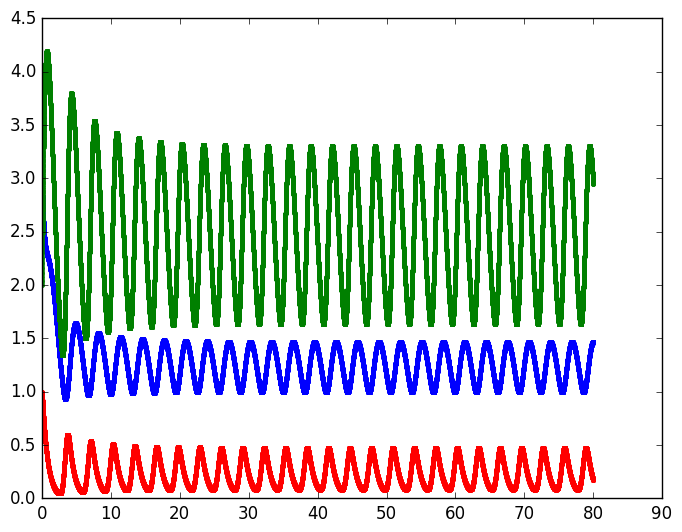

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002451DC50>

In [7]:
plot(t,R,"r.")
plot(t,T,"b.")
plot(t,L,"g.")

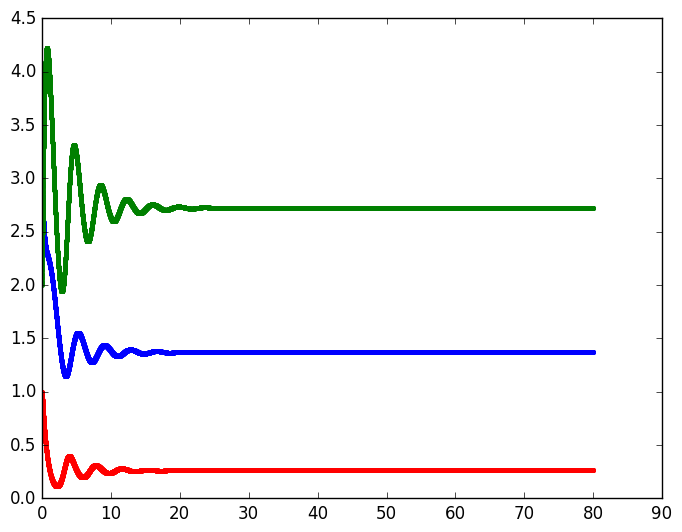

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001A146438>

In [8]:
plot(t_5,R_5,"r.")
plot(t_5,T_5,"b.")
plot(t_5,L_5,"g.")

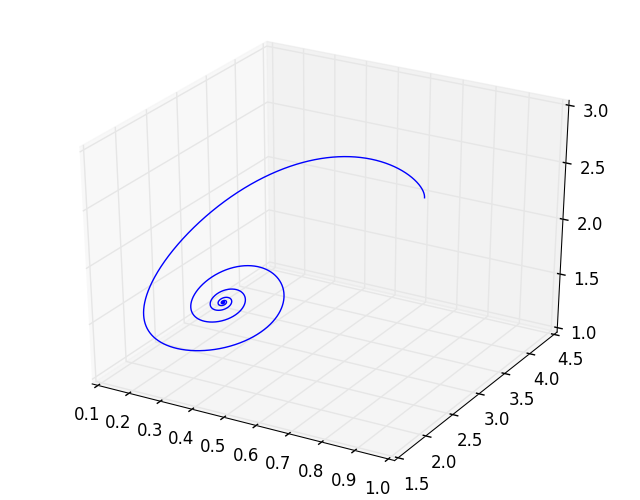

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x000000001A17EEB8>

In [9]:
plot3D(R_5,L_5,T_5)

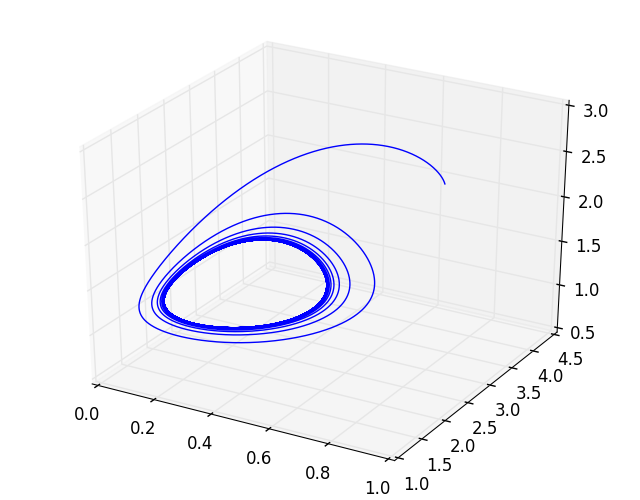

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000000027942128>

In [10]:
plot3D(R,L,T)

In [11]:
#Analisis de los valores de estabilidad

    # Tasa de difusión
    b1=1.29
    b2=0.97
    b3=1.39
    #Tasas de secreción y prealimentación
    g1=10
    g2=0.7

A=2
K=1
m=5
f(T)=A/(K+T^m)
T_5[end]*b1*b2*b3

2.3867441661673583

In [12]:
f(T_5[end])*g1*g2

2.3867441628409614

In [13]:
R_5[end]

0.2643127540075845

In [14]:
f(T_5[end])/b1

0.26431275336001786

In [15]:
L_5[end]

2.724873752113962

In [16]:
b3/g2*T_5[end]

2.7248737497772124

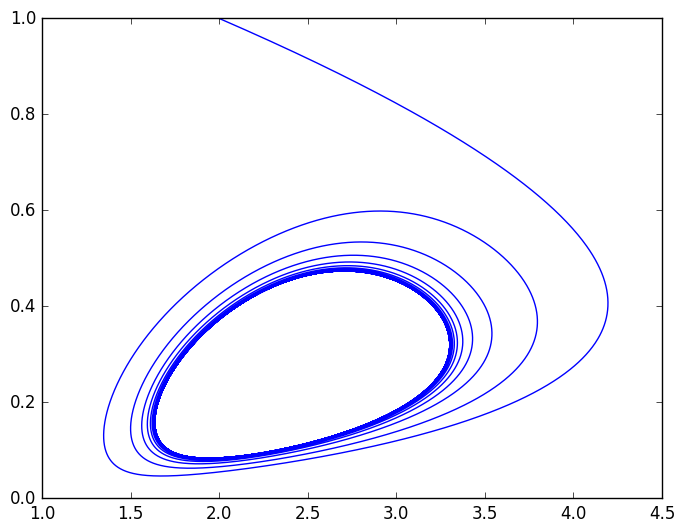

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000279DF828>

In [17]:
plot(L,R)

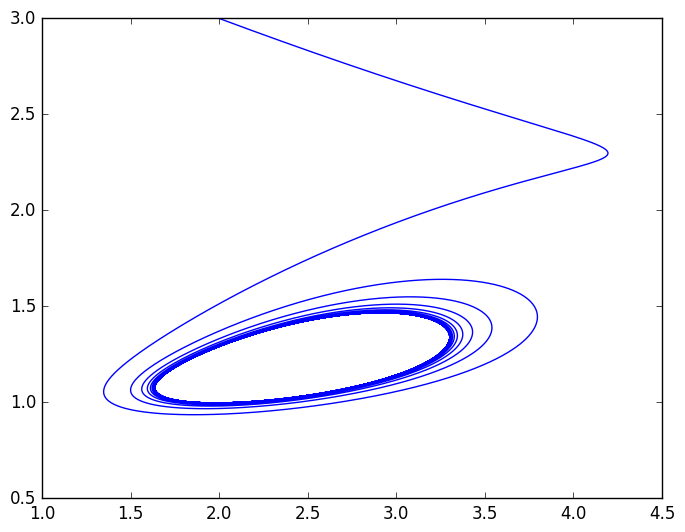

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000027A3DEF0>

In [18]:
plot(L,T)

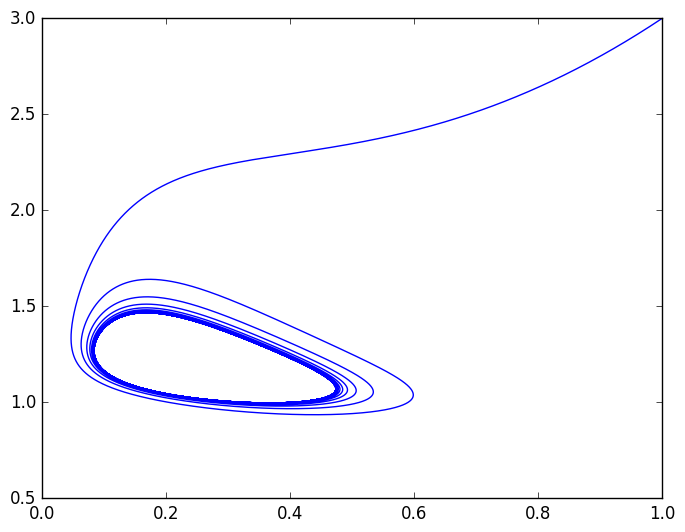

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002A9A0940>

In [19]:
plot(R,T)

Al disminuir el valor de la m en la función de retroalimentación se tiene que la función pasando del ocho deja de oscilar y decae cada vez más rapido a un valor fijo. 

### Segundo Modelo

Curiosamente se utiliza el mismo tipo de ecuación para describir la ezquisofrenia catatónica periódica. Cronin (1973,1976) propuso:

$$
f(t) = (c-ht)(1-H(t-c/h))
$$

Donde H(z) es la función de Heaveside y c,h son constantes.

In [20]:
#Heaviside
function H(x)
    if x>0
        return 1
    else
        return 0
    end
end

H (generic function with 1 method)

In [21]:
H(0)

0

In [22]:
function f_step(c,h,t)
    (c-h*t)*(1-H(t-c/h))
end

f_step (generic function with 1 method)

In [46]:
"""
La función Testosterone2 resuelve utilizando coeficientes de Taylor la ecuación diferencial \n
R'(t) = f(T)-b1*R(t) \n
L'(t) = g1*R(t)-b2*L(t) \n
T'(t) = g2*L(t)-b3*T(t) \n

Donde la función de retroalimentación está dada por
f(T) = (c-hT)(1-H(T-c/h))

La función recibe los valores en el siguiente orden: \n Testosterone2(p,R0,T0,L0,t0,tf,g1,g2,b1,b2,b3,c_f,h_f) \n
'p' determina el orden del polinomio de Taylor a utilizar. Las letras como R0 representan el valor inicital de R al tiempo 0.
Por otro lado t0 y tf determinan el tiempo inicial y final en el que se requiere la solución, y
las tasas de difussión de las hormonas están dadas por b1,b2 y b3; las tasas de secreción y prealimentación, por g1 y g2.
h_f y c_f son valores de c y h dentro de f(T)

Regresa 4 arreglos en el siguiente orden: t,R,L,T correspondientes al valor de las funciones en ese tiempo.
"""

function Testosterone2(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c_f,h_f)    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    #solución a la ecuación diferencial
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_step(c_f,h_f,T0),p)
        #Se evaluan los coeficientes de Taylor utilizando las reglas de correspondencia
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        #Se obtienen los pasos de integración para cada función
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        #Se elige el mínimo entre ellos para que todos los arreglos tengan la misma longiud
        h=minimum([hR,hL,hT])
        t0=t0+h
        #Se evalúa la función en el siguiente punto utilizando la fórmula de Horner.
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Testosterone2 (generic function with 1 method)

In [47]:
?Testosterone2

search: Testosterone2 Testosterone2_Hormones Testosterone1



La función Testosterone2 resuelve utilizando coeficientes de Taylor la ecuación diferencial 

R'(t) = f(T)-b1*R(t) 

L'(t) = g1*R(t)-b2*L(t) 

T'(t) = g2*L(t)-b3*T(t) 

Donde la función de retroalimentación está dada por f(T) = (c-hT)(1-H(T-c/h))

La función recibe los valores en el siguiente orden:   Testosterone2(p,R0,T0,L0,t0,tf,g1,g2,b1,b2,b3,c_f,h_f) 

'p' determina el orden del polinomio de Taylor a utilizar. Las letras como R0 representan el valor inicital de R al tiempo 0. Por otro lado t0 y tf determinan el tiempo inicial y final en el que se requiere la solución, y las tasas de difussión de las hormonas están dadas por b1,b2 y b3; las tasas de secreción y prealimentación, por g1 y g2. h_f y c_f son valores de c y h dentro de f(T)

Regresa 4 arreglos en el siguiente orden: t,R,L,T correspondientes al valor de las funciones en ese tiempo.


In [48]:
#Valores iniciales
R0=1.0
L0=2.0
T0=3.0

# Tasa de difusión
b1=1.29
b2=0.97
b3=1.39

#Tasas de secreción y prealimentación
g1=10
g2=0.7
    
#Valores para la función f(T)
c=2
h=1

#Intervalo
t0=0.0
tf=80.0

#Orden de coeficientes
p=10

t_s=Testosterone2(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c,h)[1];
R_s=Testosterone2(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c,h)[2];
L_s=Testosterone2(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c,h)[3];
T_s=Testosterone2(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c,h)[4];

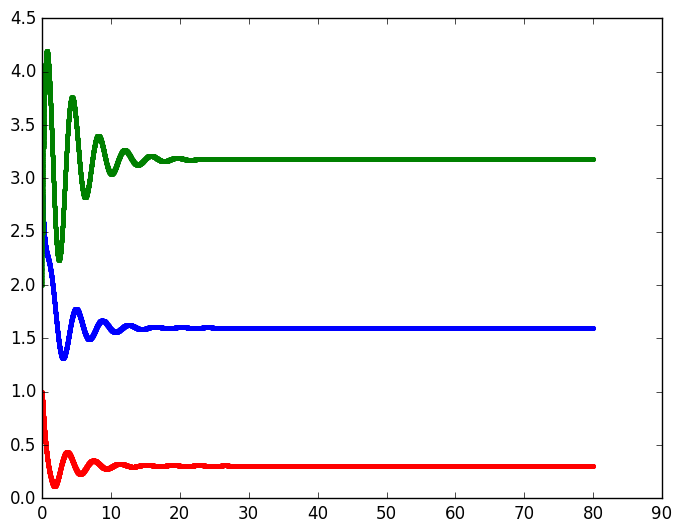

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000024EAD240>

In [49]:
plot(t_s,R_s,"r.")
plot(t_s,T_s, "b.")
plot(t_s,L_s, "g.")

### Fuente externa constante de hormonas

Si se agrega un fuente externa constante de hormonos los estados estacionarios se ven alterados. De hecho ocurre que para ciertos valores grandes de inyección de T,R o L el sistema periódico se apaga y encontramos un valor etotalmente estacionario. 
Para Wt, el valor es $ \frac{cb_{3}}{h} $

Como dice el artículo para valores de $w_{t} > \frac{cb_{3}}{h} $ L y R se van a cero comprobando lo descrito en [2], y para valores menores se tiene una osiclación de esas variables. T por otro lado debe tender al valor de $ \frac{W_{t}}{b_{3}}  $

In [50]:
"""
La función Testosterone1_Hormones resuelve utilizando coeficientes de Taylor la ecuación diferencial \n
R'(t) = f(T)-b1*R(t)+Wr \n
L'(t) = g1*R(t)-b2*L(t)+Wl \n
T'(t) = g2*L(t)-b3*T(t)+Wt \n

Donde la función de retroalimentación está dada por
f(T) = A/(K+T^m)

La función recibe los valores en el siguiente orden: \n Testosterone1(p,R0,T0,L0,t0,tf,g1,g2,b1,b2,b3,A,K,m) \n
'p' determina el orden del polinomio de Taylor a utilizar. Las letras como R0 representan el valor inicital de R al tiempo 0.
Por otro lado t0 y tf determinan el tiempo inicial y final en el que se requiere la solución, y
las tasas de difussión de las hormonas están dadas por b1,b2 y b3; las tasas de secreción y prealimentación, por g1 y g2. A,K y m
son los valores dentro f(T).
Finalmente Wr,Wl y Wl son tasas de inyección de la hormona constantes por una
fuente externa.

Regresa 4 arreglos en el siguiente orden: t,R,L,T correspondientes al valor de las funciones en ese tiempo.
"""

function Testosterone1_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m,Wr,Wl,Wt)    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    #solución a la ecuación diferencial
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        WrT=Taylor1(Wr,p)
        WlT=Taylor1(Wl,p)
        WtT=Taylor1(Wt,p)
        #Se evaluan los coeficientes de Taylor utilizando las reglas de correspondencia
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i+WrT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i+WlT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i+WtT.coeffs[i]/i
        end
        #Se obtienen los pasos de integración para cada función
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        #Se elige el mínimo entre ellos para que todos los arreglos tengan la misma longiud
        h=minimum([hR,hL,hT])
        t0=t0+h
        #Se evalúa la función en el siguiente punto utilizando la fórmula de Horner.
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Testosterone1_Hormones (generic function with 1 method)

In [51]:
"""
La función Testosterone2_Hormones resuelve utilizando coeficientes de Taylor la ecuación diferencial \n
R'(t) = f(T)-b1*R(t)+Wr \n
L'(t) = g1*R(t)-b2*L(t)+Wl \n
T'(t) = g2*L(t)-b3*T(t)+Wt \n

Donde la función de retroalimentación está dada por
f(T) = (c-hT)(1-H(T-c/h))

La función recibe los valores en el siguiente orden: \n Testosterone2(p,R0,T0,L0,t0,tf,g1,g2,b1,b2,b3,c_f,h_f) \n
'p' determina el orden del polinomio de Taylor a utilizar. Las letras como R0 representan el valor inicital de R al tiempo 0.
Por otro lado t0 y tf determinan el tiempo inicial y final en el que se requiere la solución, y
las tasas de difussión de las hormonas están dadas por b1,b2 y b3; las tasas de secreción y prealimentación, por g1 y g2.
h_f y c_f son valores de c y h dentro de f(T). Finalmente Wr,Wl y Wl son tasas de inyección de la hormona constantes por una
fuente externa.

Regresa 4 arreglos en el siguiente orden: t,R,L,T correspondientes al valor de las funciones en ese tiempo.
"""

function Testosterone2_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c_f,h_f,Wr,Wl,Wt)    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    #solución a la ecuación diferencial
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_step(c_f,h_f,T0),p)
        WrT=Taylor1(Wr,p)
        WlT=Taylor1(Wl,p)
        WtT=Taylor1(Wt,p)
        #Se evaluan los coeficientes de Taylor utilizando las reglas de correspondencia
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i+WrT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i+WlT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i+WtT.coeffs[i]/i
        end
        #Se obtienen los pasos de integración para cada función
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        #Se elige el mínimo entre ellos para que todos los arreglos tengan la misma longiud
        h=minimum([hR,hL,hT])
        t0=t0+h
        #Se evalúa la función en el siguiente punto utilizando la fórmula de Horner.
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Testosterone2_Hormones (generic function with 1 method)

In [58]:
#Valores iniciales
R0=1.0
L0=2.0
T0=3.0

# Tasa de difusión
b1=1.29
b2=0.97
b3=1.39

#Tasas de secreción y prealimentación
g1=10
g2=0.7
    
#Valores para la función f(T)
c=2
h=1

#Valores de inyección de Hormonas
Wr=0
Wl=0
Wt=c*b3/h-0.5

#Intervalo
t0=0.0
tf=80.0

#Orden de coeficientes
p=10

t_h2=Testosterone2_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c,h,Wr,Wl,Wt)[1];
R_h2=Testosterone2_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c,h,Wr,Wl,Wt)[2];
L_h2=Testosterone2_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c,h,Wr,Wl,Wt)[3];
T_h2=Testosterone2_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,c,h,Wr,Wl,Wt)[4];

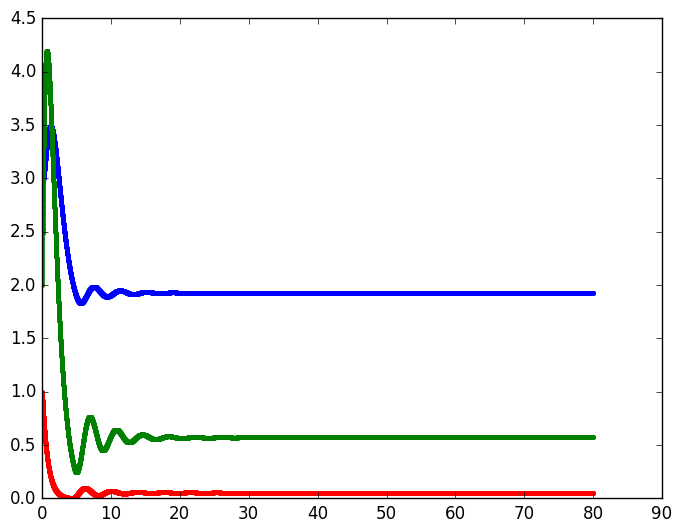

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000024F74518>

In [61]:
plot(t_h2,R_h2,"r.")
plot(t_h2,T_h2, "b.")
plot(t_h2,L_h2, "g.")

In [59]:
#Manteniendo los mismos valores pero eligiendo el primer modelo

#Valores para la función f(T)
A=2
K=1
m=12

#Valores de inyección de Hormonas
Wr=0
Wl=0
Wt=2

#Orden de coeficientes
p=10

t_h1=Testosterone1_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m,Wr,Wl,Wt)[1];
R_h1=Testosterone1_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m,Wr,Wl,Wt)[2];
L_h1=Testosterone1_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m,Wr,Wl,Wt)[3];
T_h1=Testosterone1_Hormones(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m,Wr,Wl,Wt)[4];

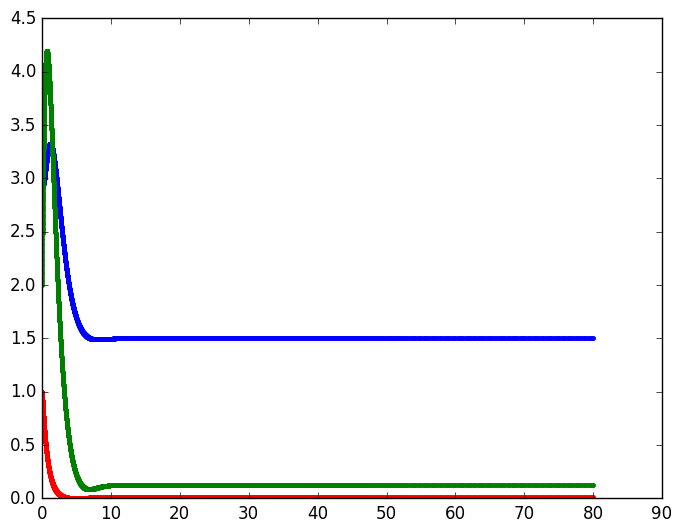

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000024EEF128>

In [60]:
plot(t_h1,R_h1,"r.")
plot(t_h1,T_h1, "b.")
plot(t_h1,L_h1, "g.")

### Pubertad

La pubertad está causada por uno o una combinación de los siguientes factores:

(i) Un incremento de la sensibilidad pituitaria para LHRH 

(ii) Un incremento de la sensibilidad gonadal para LH

(iii) Un incremento de la sensibilidad hipotálamica hacia la retroalimentación negativa de la testosterona

(iv) Un incremento en la tasa de secreción tónica de LHRH del hipotálamo

### Castración

In [31]:
#Se analiza el caso de la castración en el macho, esto se representa haciendo g2=0
#deja de haber una secreción de testosterona por parte de las gónadas.

#Valores iniciales
R0=1.0
L0=2.0
T0=3.0

# Tasa de difusión
b1=1.29
b2=0.97
b3=1.39

#Tasas de secreción y prealimentación
g1=10
g2=0.0
    
#Valores para la función f(T)
A=2
K=1
m=12

#Intervalo
t0=0.0
tf=80.0

#Orden de coeficientes
p=10

t_castration=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[1];
R_castration=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[2];
L_castration=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[3];
T_castration=Testosterone1(p,R0,L0,T0,t0,tf,g1,g2,b1,b2,b3,A,K,m)[4];

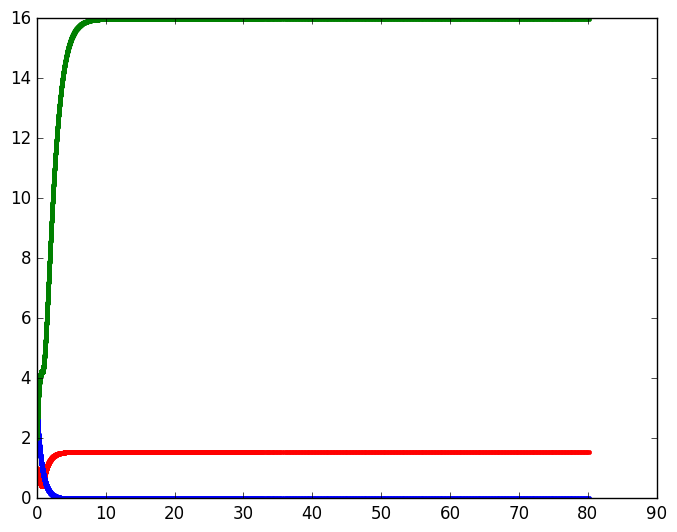

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002D847278>

In [32]:
plot(t_castration,R_castration,"r.")
plot(t_castration,T_castration,"b.")
plot(t_castration,L_castration,"g.")

No encuentro que haya dependencia de la 'm' en la función de retroalimentación. Por lo que veo el parametro que más altera el valor es la b3, la tasa de difusión de la testosterona en la sangre.

#### Referencias:

[1] Murray, J. D. 1989. Mathematical Biology. Volume 19. 

[2] Smith, William R. "Hypothalamic regulation of pituitary secretion of luteinizing hormone—II feedback control of gonadotropin secretion." Bulletin of Mathematical Biology 42.1 (1980): 57-78.

x

In [33]:
function Pubertad1(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    #Parámetros Biológicos
    
    # Tasa de difusión
    b1=1.29
    b2=0.97
    b3=1.39
    #Tasas de secreción y prealimentación
    g1=10
    g2=0.7
    
    #Valores para la función f(T)
    c=2
    h_f=1
    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]

    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        g1 = g1+3*h
    end
    return (t,R,L,T)
end

Pubertad1 (generic function with 1 method)

In [34]:
t_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[4];

LoadError: LoadError: UndefVarError: f_schizophrenia not defined
while loading In[34], in expression starting on line 1

In [35]:
plot(t_p1,R_p1,"r.")
plot(t_p1,T_p1, "b.")
plot(t_p1,L_p1, "g.")

LoadError: LoadError: UndefVarError: t_p1 not defined
while loading In[35], in expression starting on line 1

In [36]:
function Pubertad2(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    #Parámetros Biológicos
    
    # Tasa de difusión
    b1=1.29
    b2=0.97
    b3=1.39
    #Tasas de secreción y prealimentación
    g1=10
    g2=0.7
    
    #Valores para la función f(T)
    c=2
    h_f=1
    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        g2 = g2+3*h
    end
    return (t,R,L,T)
end

Pubertad2 (generic function with 1 method)

In [37]:
t_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[4];

LoadError: LoadError: UndefVarError: f_schizophrenia not defined
while loading In[37], in expression starting on line 1

In [38]:
plot(t_p2,R_p2,"r.")
plot(t_p2,T_p2, "b.")
plot(t_p2,L_p2, "g.")

LoadError: LoadError: UndefVarError: t_p2 not defined
while loading In[38], in expression starting on line 1

In [39]:
function Pubertad3(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    #Parámetros Biológicos
    
    # Tasa de difusión
    b1=1.29
    b2=0.97
    b3=1.39
    #Tasas de secreción y prealimentación
    g1=10
    g2=0.7
    
    #Valores para la función f(T)
    c=2
    h_f=1
    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        h_f = h_f+h
    end
    return (t,R,L,T)
end

Pubertad3 (generic function with 1 method)

In [40]:
t_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[4];

LoadError: LoadError: UndefVarError: f_schizophrenia not defined
while loading In[40], in expression starting on line 1

In [41]:
plot(t_p3,R_p3,"r.")
plot(t_p3,T_p3, "b.")
plot(t_p3,L_p3, "g.")

LoadError: LoadError: UndefVarError: t_p3 not defined
while loading In[41], in expression starting on line 1

In [42]:
function Pubertad4(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    #Parámetros Biológicos
    
    # Tasa de difusión
    b1=1.29
    b2=0.97
    b3=1.39
    #Tasas de secreción y prealimentación
    g1=10
    g2=0.7
    
    #Valores para la función f(T)
    c=2
    h_f=1
    
    #Valores iniciales
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        c = c + h
    end
    return (t,R,L,T)
end

Pubertad4 (generic function with 1 method)

In [43]:
t_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[4];

LoadError: LoadError: UndefVarError: f_schizophrenia not defined
while loading In[43], in expression starting on line 1

In [44]:
plot(t_p4,R_p4,"r.")
plot(t_p4,T_p4, "b.")
plot(t_p4,L_p4, "g.")

LoadError: LoadError: UndefVarError: t_p4 not defined
while loading In[44], in expression starting on line 1